<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Exercise_Multiple_Linear_Regression_Carat_diamond_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise: Multiple Linear Regression**
---


**Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

- Analyze the relationship
- Apply Multiple Linear Regression with dummy variable
- Check multicollinearity
- Check the assumptions
- Interpret the result
- Use α 5% (α = 0.05)

**Try to find the best model without any multicollinearity**


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

### `Business Problem Understanding`

**Context**

Diamonds are among the most sought-after gemstones, valued for their rarity, sparkle, and symbolic meaning. The price of a diamond is influenced by various factors, including carat weight, color, cut, and clarity, collectively known as the "4 Cs." `Carat` refers to the size of the diamond, `color` measures the presence of color in the stone, `cut` determines the proportions and angles of the diamond, and `clarity` assesses the presence of flaws or inclusions. Each of these factors plays a crucial role in determining the value and, ultimately, the price of a diamond.

**Problem Statement**

While the importance of the "4 Cs" in determining diamond pricing has been recognized, accurately predicting a diamond's price based on these factors remains a challenging task. Traditional pricing models often rely on subjective assessments or limited datasets, leading to discrepancies and inaccuracies in price estimates. Furthermore, the complex interactions between carat, color, cut, and clarity make it difficult to develop precise predictive models using conventional statistical methods alone.

Therefore, the challenge is to develop a robust and accurate prediction model for diamond prices based on carat weight, color, cut, and clarity. By addressing this challenge, stakeholders in the diamond industry, including retailers, wholesalers, and consumers, can benefit from a more transparent and reliable pricing mechanism, leading to more informed purchasing decisions and increased market efficiency.

**Goals**

Determining the right price for diamonds based on their characteristics.

**Analytic Approach**

So, what we need to do is analyze the data to find patterns in the features that differentiate one diamond from another.

Next, we will build a regression model that will help companies provide diamond price prediction tools, which will be useful for ensuring transparent and reliable pricing.

**Metric Evaluation**

The evaluation metrics used are MSE and RMSE. The smaller the values, the more accurate the model is in predicting diamond prices, given the limitations of the features used.

Furthermore, we can also reduce the R-squared value or adj. R-squared measures how well a model represents the overall variance of the data. The closer it is to 1, the better the model fits the observed data. However, this metric is not valid for non-linear models.

### `Data Understanding`

In [2]:
# Load dataset
data = sns.load_dataset('diamonds')
print(f'Number of rows and columns {data.shape}')

data.head()

Number of rows and columns (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The data consists of 53940 rows and 10 columns.

---
| Target | Description | Values |
| --- | --- | --- |
| price | price in US dollars |\$326-\$18,823 |

---

| Features | Description | Values |
| --- | --- | --- |
| carat | weight of the diamond | 0.2-5.01 |
|cut|quality of the cut | Fair, Good, Very Good, Premium, Ideal|
|color|diamond colour | J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is |I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)|
|x|length in mm |0-10.74|
|y|width in mm |0-58.9|
|z|depth in mm |0-31.8|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y) |43-79|
|table|width of top of diamond relative to widest point |43-95|

**Initial Assesment**

In [3]:
# Check data type, null values, and unique values ​​of each column

pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,carat,float64,0.0,False,273,"[0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3..."
1,cut,category,0.0,False,5,"['Ideal', 'Premium', 'Good', 'Very Good', 'Fai..."
2,color,category,0.0,False,7,"['E', 'I', 'J', 'H', 'F', 'G', 'D'] Categories..."
3,clarity,category,0.0,False,8,"['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', '..."
4,depth,float64,0.0,False,184,"[61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61...."
5,table,float64,0.0,False,127,"[55.0, 61.0, 65.0, 58.0, 57.0, 56.0, 54.0, 62...."
6,price,int64,0.0,False,11602,"[326, 327, 334, 335, 336, 337, 338, 339, 340, ..."
7,x,float64,0.0,False,554,"[3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 4.07, 3.87..."
8,y,float64,0.0,False,552,"[3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 4.11, 3.7..."
9,z,float64,0.0,False,375,"[2.43, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.4..."


**Insight**

- The dataset consists of 53,940 rows and 10 columns.
- Numeric variables: carat, depth, table, price, x, y, and z
- Categorical variables: cut, color, and clarity
- No missing values ​​in the data

**Numerical variable**

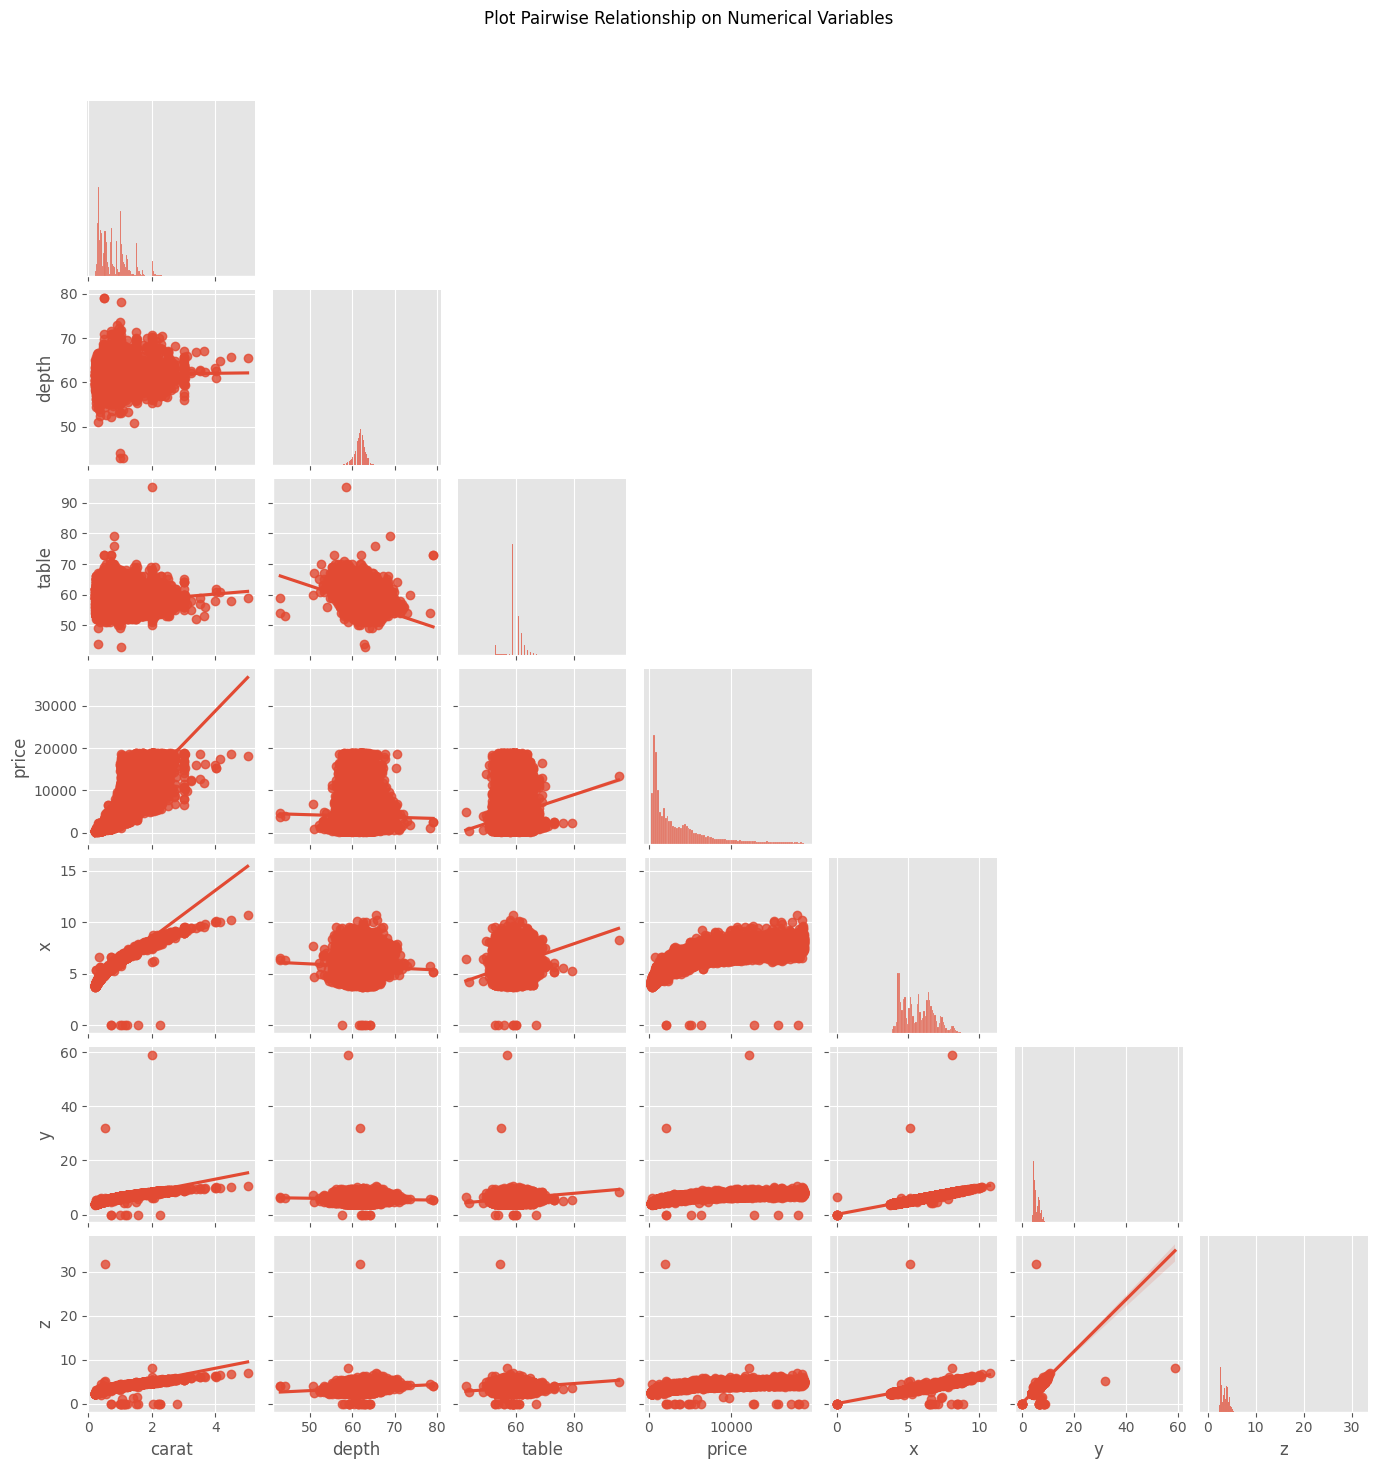

In [5]:
numerical = [var for var in data.columns if data[var].dtypes != 'category']

graph = sns.pairplot(data[numerical], corner=True, kind='reg', height=2)
graph.fig.suptitle('Plot Pairwise Relationship on Numerical Variables', y=1.05)
plt.show()

**Insight**

- There is a positive relationship between the carat, x, y, and z features and the target price

**Data Distribution**

In [6]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,carat,8926.737828,0.0,Not Normally Distributed
1,depth,6613.701780,0.0,Not Normally Distributed
2,table,8034.751738,0.0,Not Normally Distributed
3,price,15096.649760,0.0,Not Normally Distributed
4,x,3120.253700,0.0,Not Normally Distributed
5,y,40315.993147,0.0,Not Normally Distributed
6,z,28986.640114,0.0,Not Normally Distributed


**Insight**
- Based on the normality test, all numerical data is not normally distributed.

**Correlation**

In [ ]:
plt.figure(figsize=(10,10))

matrix = np.triu(data.corr(method='spearman'))

sns.heatmap(data=data.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Insight**

- There is a strong relationship between the target price and the carat, x, y, and z features.
- There is a strong relationship between the x, y, and z features. This may indicate multicollinearity in the dataset.

**Categorical variable**

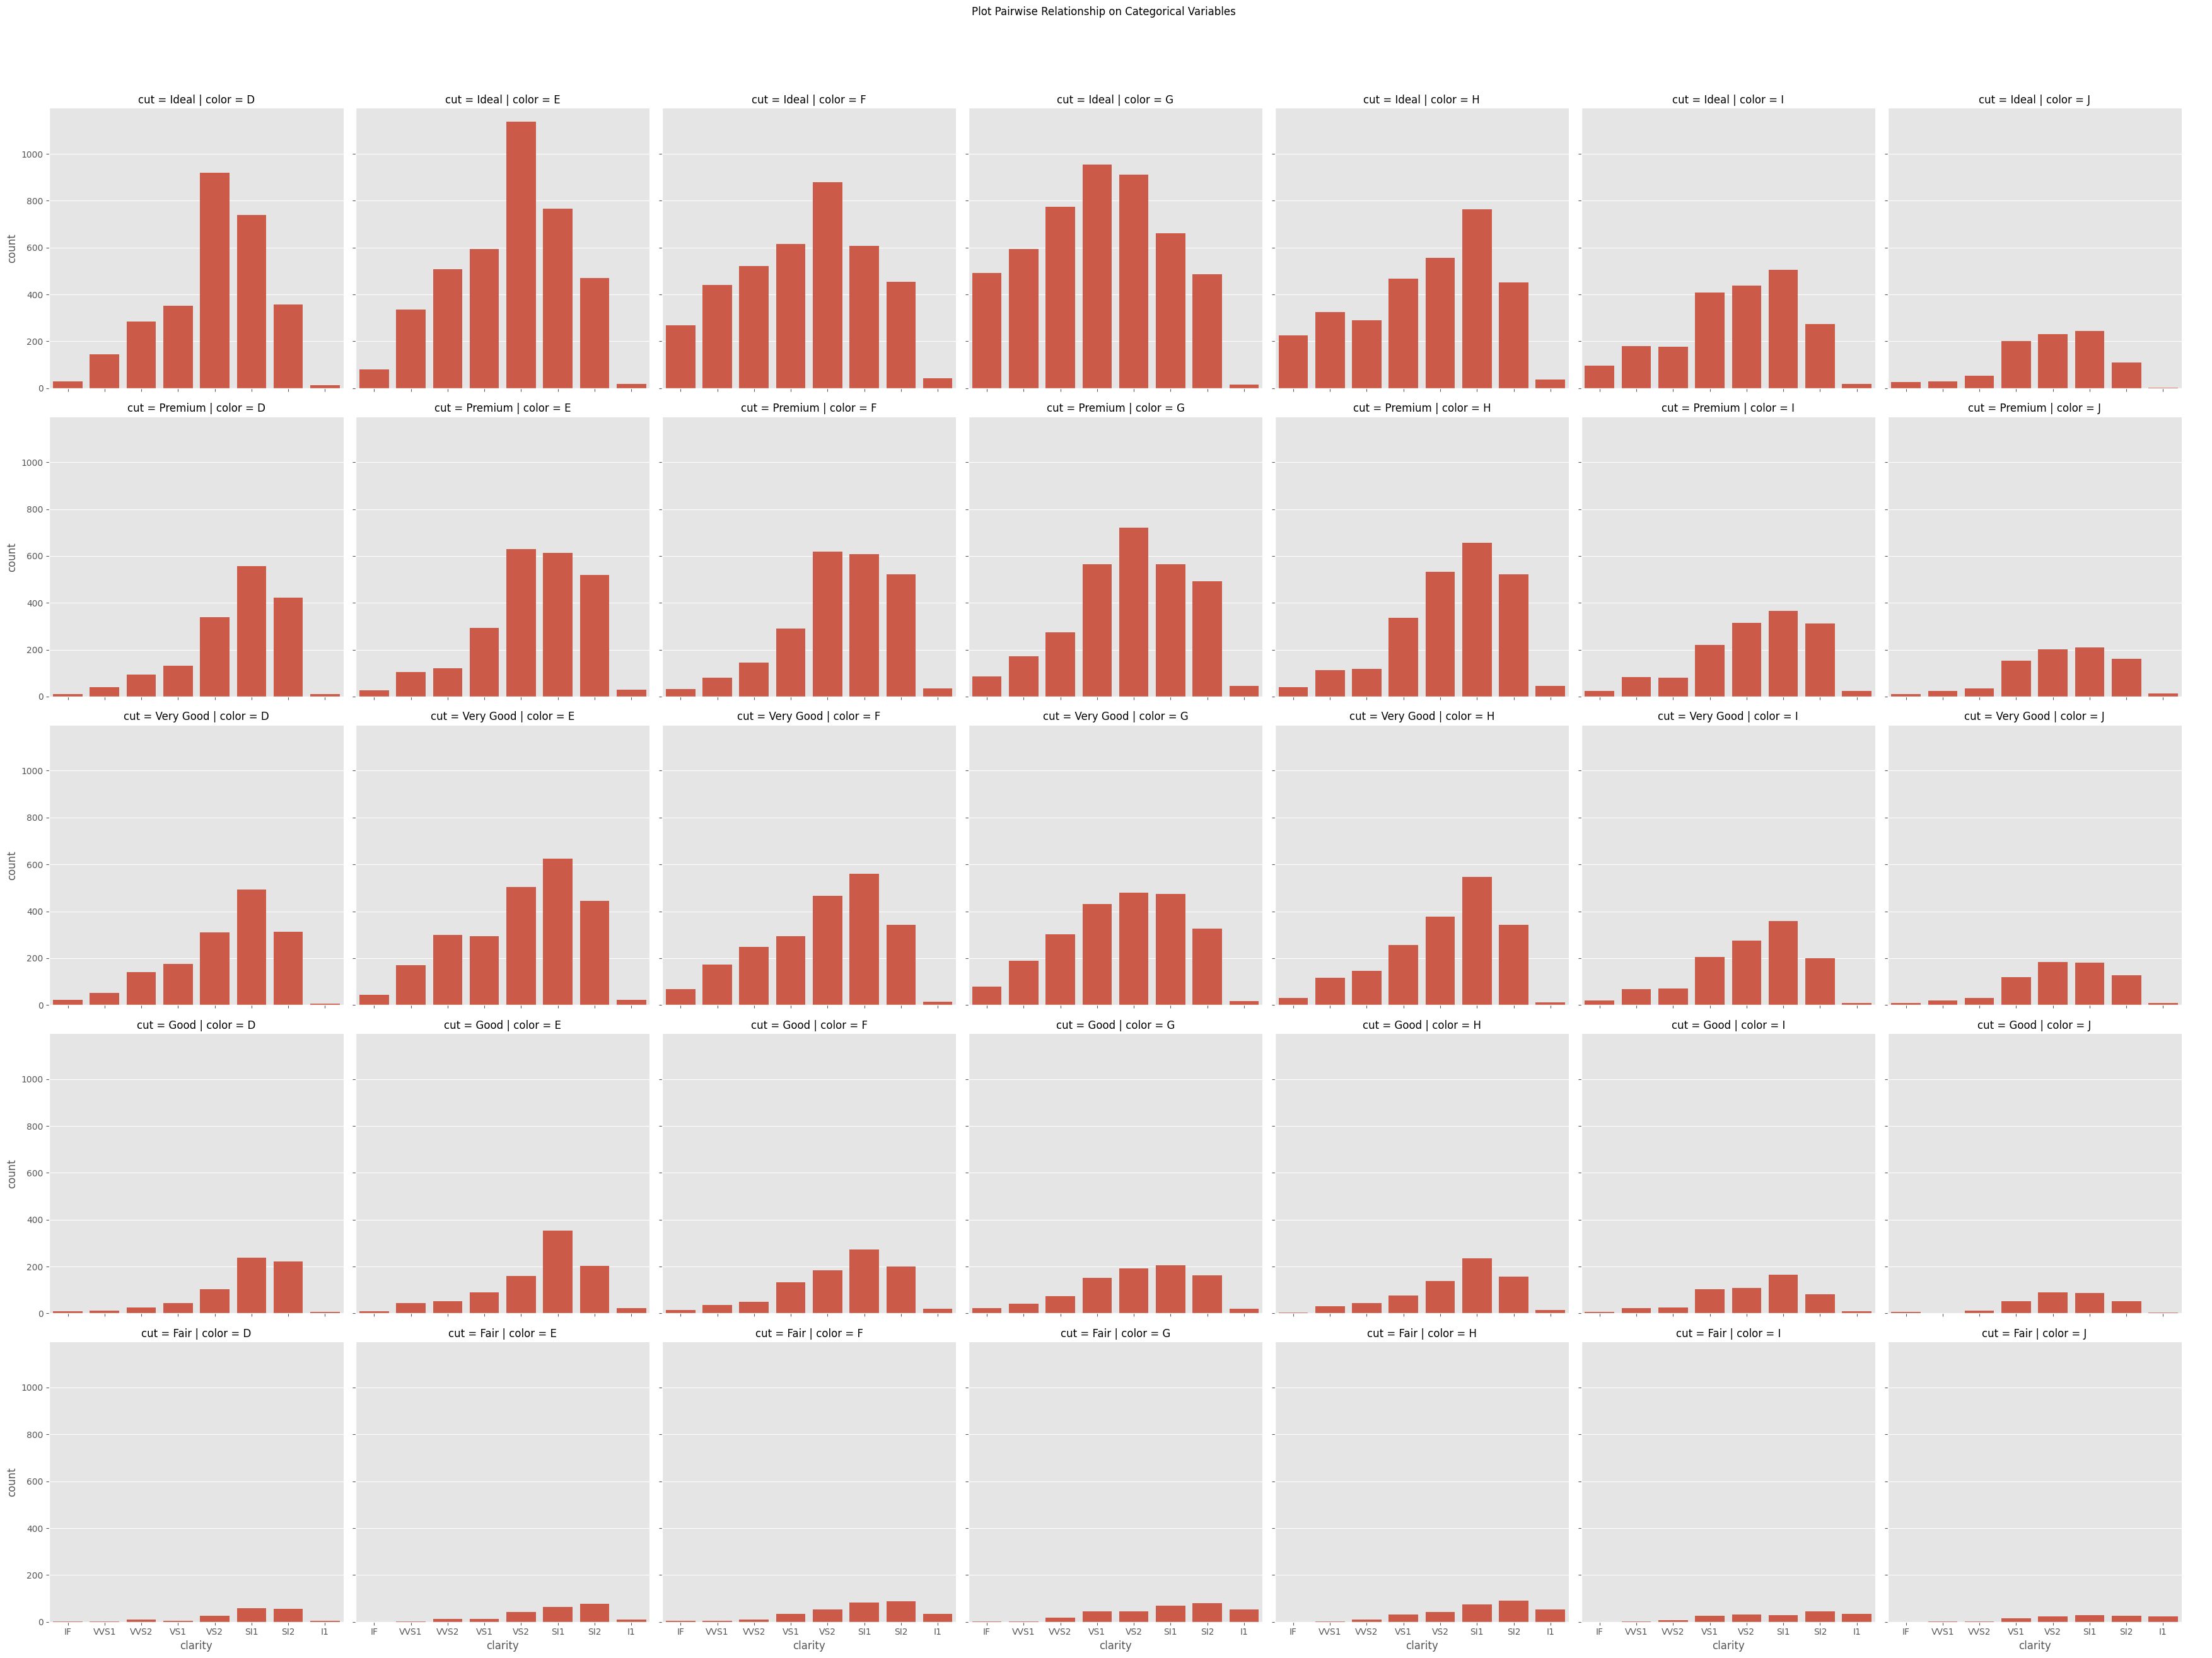

In [7]:
categorical = [var for var in data.columns if data[var].dtypes == 'category']

graph = sns.catplot(data=data[categorical], x='clarity', row='cut', col='color', kind='count')
graph.fig.suptitle('Plot Pairwise Relationship on Categorical Variables', y=1.05)
plt.show()

**Insight**

- Most diamonds have an ideal cut type.
- Diamonds with the J (worst) color type are the smallest in the dataset.
- Generally, diamonds in the dataset have clarity capabilities of VS1, VS2, SI1, and SI2.

**Feature vs Target**

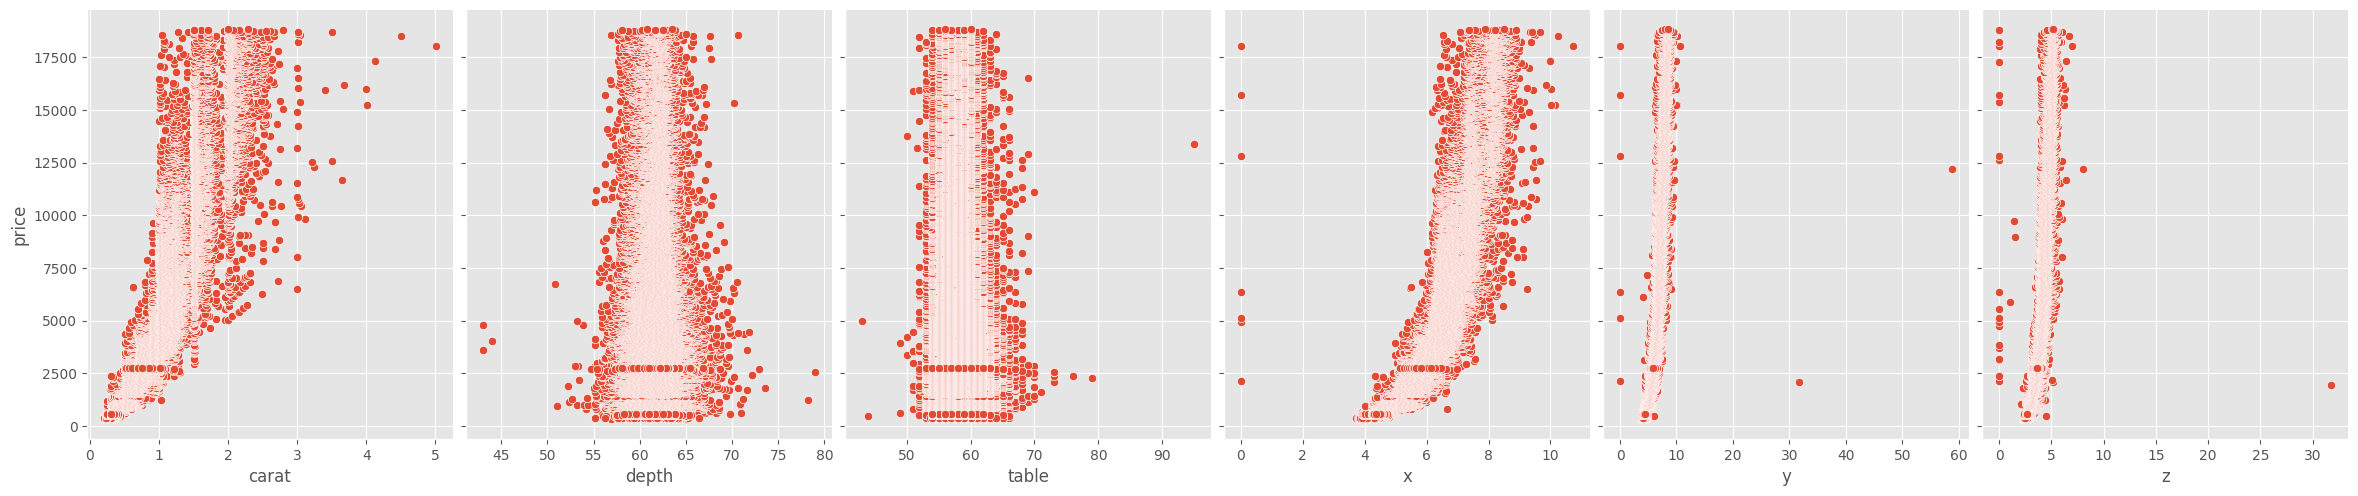

In [8]:
sns.pairplot(data, x_vars=['carat', 'depth', 'table', 'x', 'y', 'z'], y_vars='price', height=5, aspect=0.8)
plt.show()

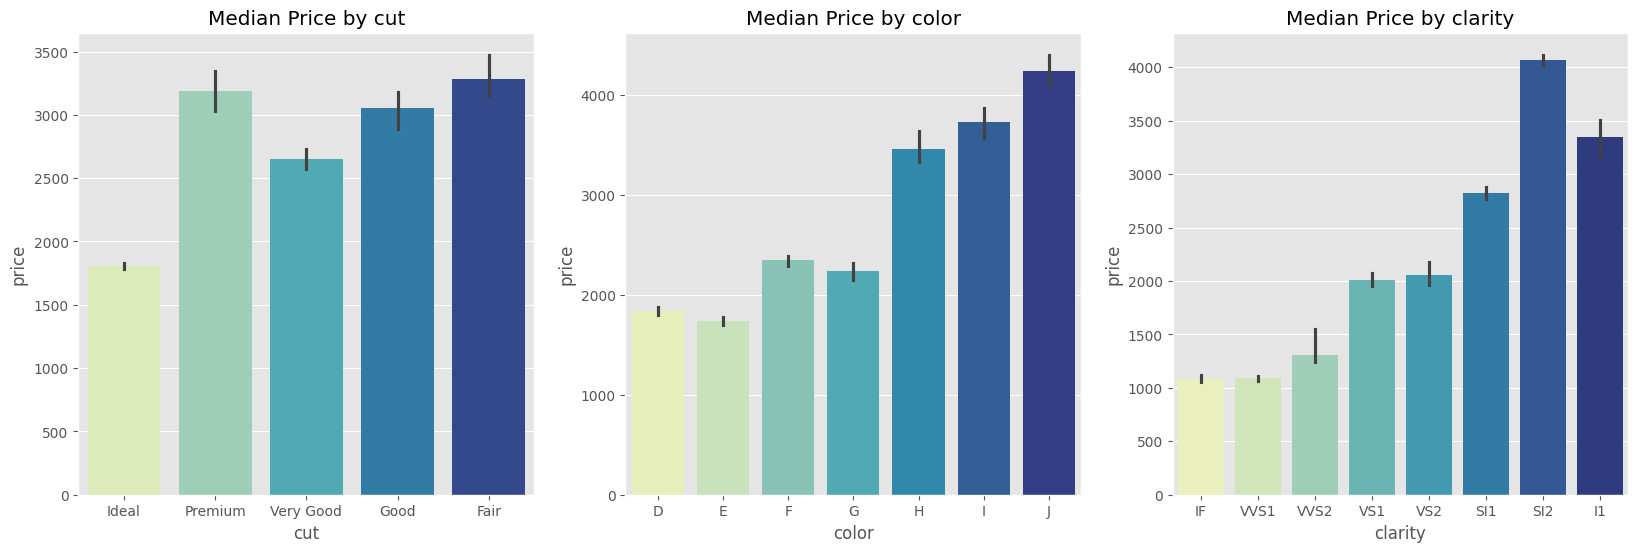

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

for i, column in enumerate(categorical):
    sns.barplot(data=data, x=column, y='price', estimator=np.median, ax=axes[i], palette='YlGnBu')
    axes[i].set_title(f'Median Price by {column}')

plt.show()

**Insight**
- There is a positive relationship between carat, x, y, and z features and price.
- The ideal diamond cut has the lowest median price.
- The median diamond price gradually increases from color D to color J.
- Diamonds with the best clarity (IF) have a lower median price than diamonds with the lowest clarity (I1).
- We need to be careful in drawing conclusions. It's best to analyze not only bivariate analysis but also multivariate analysis.

### `Data Preparation`

**Duplicated Value**, Detection and quantification of data duplication

In [10]:
print(f"Total duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of duplicated data: {len(data[data.duplicated()])/len(data)*100:.2f}%')

Total duplicated data: (146, 10)
Percentage of duplicated data: 0.27%


As much as 0.27% of the data is indicated as duplicate, so remove one of them.

Handling duplicated data:

In [11]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

**Missing Value**, Detection and quantification of missing values

In [12]:
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


There are no missing values.

**Rare Label**, rare labels were found in the `clarity` and `cut` columns, some categories appeared dominantly, while others only appeared in a small amount of data. If rare labels are used, they can add noise, causing overfitting to the model.

In [13]:
def check_rare_label(col):
    temp_df = data[col].value_counts(normalize=True)

    plt.figure(figsize=(6, 3))
    fig = temp_df.plot.bar(rot=0)
    fig.set_xlabel(col)
    fig.set_ylabel(f'Percentage of {col}')
    fig.set_title(f'Proportion of {col}')

    plt.axhline(y=0.05, color='red', linestyle='--')
    plt.show()

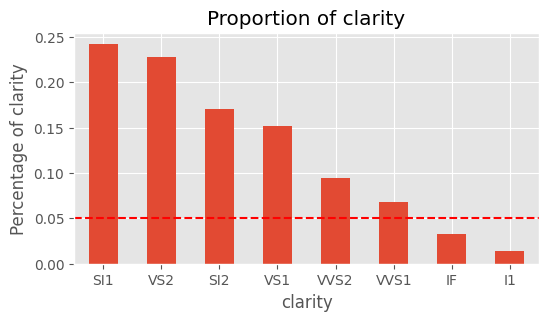

In [14]:
check_rare_label('clarity')

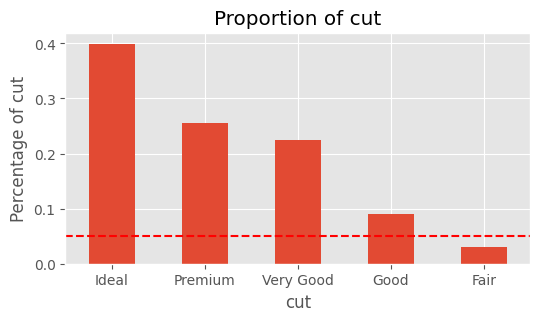

In [15]:
check_rare_label('cut')

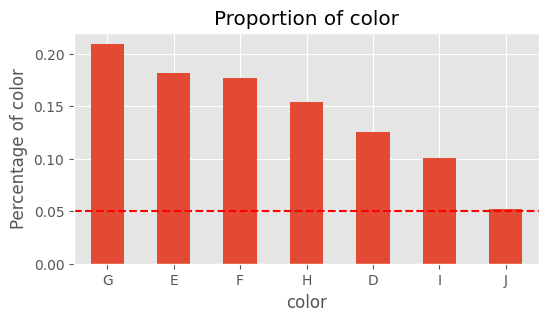

In [16]:
check_rare_label('color')

**Insight**

- In the cut feature, **Fair** is a value that appears infrequently or is labeled rare.
- In the clarity feature, **IF** and **I1** are values ​​that appear infrequently or are labeled rare.
- In the color feature, all color types appear with a proportion of at least 5%, with color **G** being the diamond with the highest frequency.

An outlier is a data point that differs significantly from the rest of the data. Linear models, especially linear regression, are sensitive to outliers. Therefore, we need to detect and handle outliers.

First, try detecting and quantifying outliers univariately.

In [17]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,carat,1873,3.48,-0.560,2.000
1,depth,2525,4.69,58.750,64.750
2,table,604,1.12,51.500,63.500
3,price,3523,6.55,-5612.625,11890.375
4,x,31,0.06,1.965,9.285
5,y,28,0.05,1.990,9.270
6,z,48,0.09,1.230,5.710


**Insight**
- There are outliers in each numerical column, with the highest percentage in the price column, which is the target.
- We will remove outliers in the price column.

In [18]:
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,carat,1873,3.48,-0.560,2.000
1,depth,2525,4.69,58.750,64.750
2,table,604,1.12,51.500,63.500
3,price,3523,6.55,-5612.625,11890.375
4,x,31,0.06,1.965,9.285
5,y,28,0.05,1.990,9.270
6,z,48,0.09,1.230,5.710


In [19]:
data.shape

(53794, 10)

In [20]:
# Outlier removal
for i, row in outlier_df.iterrows():
    data = data[(data[row['Column']] > row['Lower Bound']) & (data[row['Column']] < row['Upper Bound'])]

In [21]:
data.shape

(47377, 10)

**Feature Engineering**

Convert categorical variables to numeric variables using encoding

In [22]:
y = data['price']
X = data.drop(columns=['price'])
X = pd.get_dummies(data=X, dtype=int, drop_first=True)
X.head()

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5,0.24,62.8,57.0,3.94,3.96,2.48,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


**Check Multicollinearity**

In [23]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, i) for i in range(len(X.columns))]

    return vif.sort_values('VIF', ascending=False)

We will carry out repeated testing until we obtain a VIF value < 10.

In [24]:
vif_df = calculate_vif(X)
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(X.drop(columns=dropped_columns))

In [25]:
vif_df

,Feature,VIF
0,carat,5.877179
15,clarity_SI1,3.170842
14,clarity_VS2,2.840762
16,clarity_SI2,2.697629
7,color_G,2.281403
13,clarity_VS1,2.270271
5,color_E,2.149866
6,color_F,2.074350
8,color_H,1.980788
12,clarity_VVS2,1.718132


In [26]:
dropped_columns

['x', 'z', 'y', 'table', 'depth']

Now there are no columns with Multicollinearity

In [27]:
X = sm.add_constant(X.drop(columns=dropped_columns))
X.head()

,const,carat,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,1.0,0.23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,0.21,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,0.29,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1.0,0.31,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,1.0,0.24,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


**Data Splitting**

Divide the dataset into train and test sets with a composition of 80:20.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((37901, 19), (9476, 19))

### `Modeling`

**Simple Linear Regression**

In [29]:
simpleLR = sm.OLS(y_train, X_train[['const', 'carat']])
simpleLR_result = simpleLR.fit()

print(simpleLR_result.summary().tables[0])
print(simpleLR_result.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 2.196e+05
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:04:55   Log-Likelihood:            -3.1751e+05
No. Observations:               37901   AIC:                         6.350e+05
Df Residuals:                   37899   BIC:                         6.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1750.1045     11.665   -150.032      0.0

Prediction on the test set using linear regression

In [30]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

y_pred  = simpleLR_result.predict(X_test[['const', 'carat']])

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')

MSE: 1166820.9399651182
RMSE: 1080.1948620342157


**Multiple Linear Regression**

In [31]:
multipleLR = sm.OLS(y_train, X_train)
multipleLR_result = multipleLR.fit()

print(multipleLR_result.summary().tables[0])
print(multipleLR_result.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.491e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:05:38   Log-Likelihood:            -3.0546e+05
No. Observations:               37901   AIC:                         6.110e+05
Df Residuals:                   37882   BIC:                         6.111e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -965.5308     24.393    -39.582

Prediction on the test set using linear regression

In [32]:
y_pred  = multipleLR_result.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')

MSE: 602846.9584722855
RMSE: 776.4321982454653


**Performance Comparison**

After predictions were made on the test set, the cumulative performance of multiple linear regression was better than that of multiple linear regression. We will use the multiple linear regression model.

**Interpretation**

In [33]:
print(multipleLR_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.491e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:06:31   Log-Likelihood:            -3.0546e+05
No. Observations:               37901   AIC:                         6.110e+05
Df Residuals:                   37882   BIC:                         6.111e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -965.5308     24.393    -39.582

In [34]:
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(multipleLR_result.resid, multipleLR_result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', np.float64(4569.539549401348)),
 ('p-value', np.float64(0.0))]

In [35]:
result = multipleLR_result

`R-Squared:`

In [36]:
print(f'''
Adjusted R-squared = {result.rsquared.round(3)}.
This means the model can explain {(result.rsquared*100).round(1)}% of the price variance.
The remaining {(100-result.rsquared*100).round(1)}% can be explained by other variables not included in the model.
''')


Adjusted R-squared = 0.922.
This means the model can explain 92.2% of the price variance.
The remaining 7.8% can be explained by other variables not included in the model.



`F-test (Simultant test):`

In [38]:
if result.f_pvalue.round(3) < 0.05 :
  print(f'''
- pvalue = {result.f_pvalue.round(3)}
- pvalue < 0.05. Reject Ho.
- There is at least one feature that significantly influences the target.
''')
else :
  print(f'''
- pvalue = {result.f_pvalue.round(3)}
- pvalue > 0.05. Fail to reject Ho.
- No features significantly influence the target.
''')


- pvalue = 0.0
- pvalue < 0.05. Reject Ho.
- There is at least one feature that significantly influences the target.



`t-test (Partial test)`

In [42]:
df_results = pd.DataFrame({
    'coeff' : result.params,
    'pvalue' : result.pvalues
}).reset_index().rename(columns={'index':'column'})

In [45]:
for i in range(len(df_results)) :
  if df_results['column'].iloc[i] == 'const':
    if df_results['pvalue'].iloc[i] < 0.05 :
      print(f"- B0 (const) --> pvalue = {df_results['pvalue'].iloc[i]:.3f}. pvalue < 0.05. Reject Ho. Model requires intercept.")
    else :
      print(f"- B0 (const) --> pvalue = {df_results['pvalue'].iloc[i]:.3f}. pvalue > 0.05. Fail to Reject Ho. Model does not require intercept.")
  else :
    if df_results['pvalue'].iloc[i] < 0.05 :
      print(f"- B{i} ({df_results['column'].iloc[i]}) --> pvalue = {df_results['pvalue'].iloc[i]:.3f}. pvalue < 0.05. Reject Ho. {df_results['column'].iloc[i]} has a significant effect on the target.")

    else :
      print(f"- B{i} ({df_results['column'].iloc[i]}) --> pvalue = {df_results['pvalue'].iloc[i]:.3f}. pvalue > 0.05. Fail to Reject Ho. {df_results['column'].iloc[i]} does not have a significant effect on the target.")

- B0 (const) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. Model requires intercept.
- B1 (carat) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. carat has a significant effect on the target.
- B2 (cut_Premium) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. cut_Premium has a significant effect on the target.
- B3 (cut_Very Good) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. cut_Very Good has a significant effect on the target.
- B4 (cut_Good) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. cut_Good has a significant effect on the target.
- B5 (cut_Fair) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. cut_Fair has a significant effect on the target.
- B6 (color_E) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. color_E has a significant effect on the target.
- B7 (color_F) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. color_F has a significant effect on the target.
- B8 (color_G) --> pvalue = 0.000. pvalue < 0.05. Reject Ho. color_G has a significant effect on the target.
- B9 (color_H) --> pval

`Parameter Estimate:`

In [47]:
for i in range(len(df_results)) :
    if df_results['column'].iloc[i] == 'const':
        print(f"- B{i} ({df_results['column'].iloc[i]}) = {df_results['coeff'].iloc[i].round(2)} --> If all features are 0, then price is worth {df_results['coeff'].iloc[i].round(2)} dollars")
    elif len(df_results['column'].iloc[i].split('_')) == 1:
        if df_results['coeff'].iloc[i].round(2) > 0 :
            print(f"- B{i} ({df_results['column'].iloc[i]}) = {df_results['coeff'].iloc[i].round(2)} --> If {df_results['column'].iloc[i]} increases by 1, then the price increases {df_results['coeff'].iloc[i].round(2)} dollars")
        else :
            print(f"- B{i} ({df_results['column'].iloc[i]}) = {df_results['coeff'].iloc[i].round(2)} --> If {df_results['column'].iloc[i]} increases by 1, then the price decreases {-df_results['coeff'].iloc[i].round(2)} dollars")
    else :
        column = df_results['column'].iloc[i].split('_')[0]
        if df_results['coeff'].iloc[i].round(2) > 0 :
            print(f"- B{i} ({df_results['column'].iloc[i]}) = {df_results['coeff'].iloc[i].round(2)} --> The average price of {df_results['column'].iloc[i]} is greater by {df_results['coeff'].iloc[i].round(2)} dollars than {column}_{data[column].cat.categories[0]}")
        else :
            print(f"- B{i} ({df_results['column'].iloc[i]}) = {df_results['coeff'].iloc[i].round(2)} dollars --> The average price of {df_results['column'].iloc[i]} is less by {-df_results['coeff'].iloc[i].round(2)} dollars than {column}_{data[column].cat.categories[0]}")

- B0 (const) = -965.53 --> If all features are 0, then price is worth -965.53 dollars
- B1 (carat) = 7841.33 --> If carat increases by 1, then the price increases 7841.33 dollars
- B2 (cut_Premium) = -95.26 dollars --> The average price of cut_Premium is less by 95.26 dollars than cut_Ideal
- B3 (cut_Very Good) = -109.79 dollars --> The average price of cut_Very Good is less by 109.79 dollars than cut_Ideal
- B4 (cut_Good) = -209.59 dollars --> The average price of cut_Good is less by 209.59 dollars than cut_Ideal
- B5 (cut_Fair) = -545.65 dollars --> The average price of cut_Fair is less by 545.65 dollars than cut_Ideal
- B6 (color_E) = -164.39 dollars --> The average price of color_E is less by 164.39 dollars than color_D
- B7 (color_F) = -233.64 dollars --> The average price of color_F is less by 233.64 dollars than color_D
- B8 (color_G) = -352.98 dollars --> The average price of color_G is less by 352.98 dollars than color_D
- B9 (color_H) = -687.63 dollars --> The average price o

Model Limitations:
- Model prediction results are only valid for the carat range 0.2 - 1.99.
- Model prediction results are only valid for the cut grades Fair, Good, Very Good, Premium, and Ideal.
- Model prediction results are only valid for color grades J (worst) to D (best).
- Model prediction results are only valid for clarity grades I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (best).

Residual:

Text(0, 0.5, 'Residuals')

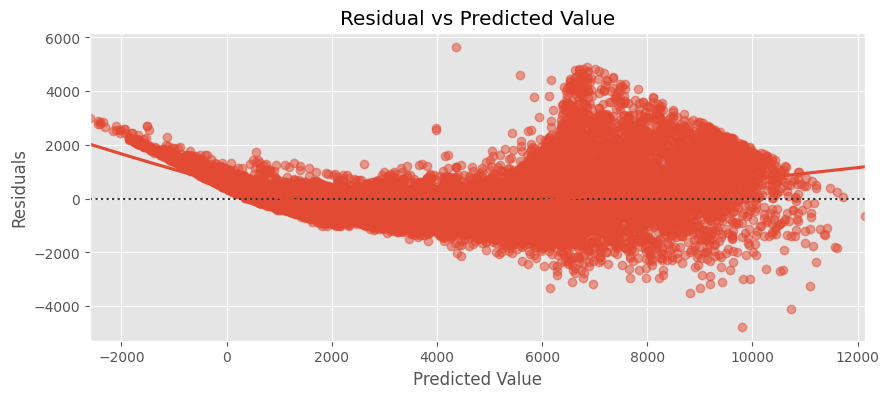

In [48]:
plt.figure(figsize=(10,4))

plot = sns.residplot(
    x=multipleLR_result.fittedvalues,       # y_pred
    y=y_train,
    lowess=True,                            # adding line
    scatter_kws={'alpha':0.5}               # opacity
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

- **Prob(JB) < 0.05**: Non-normal distribution
- **Durbin-Watson ~= 2**: Uncorrelated
- **Prop(BP-test) < 0.05**: Homoscedasticity

**Model performance summary**

| Model                     | R²    | Adj. R² | MSE        | RMSE   |
|----------------------------|-------|---------|------------|--------|
| Simple Linear Regression   | 0.853 | 0.853   | 1,166,820  | 1080.19|
| Multiple Linear Regression | 0.922 | 0.922   |   602,847  |  776.43|


### `Conclusion`

Based on **the goodness of fit**, or how well the model’s predicted values match the actual data:

* The multiple linear regression model performs better than the simple linear regression model. It achieves an R² = 0.922, compared to R² = 0.853 for the simple model. This means the multiple regression explains more variance in diamond prices.

* The Adjusted R² = 0.922 further confirms that the improvement is not just due to adding more predictors, but that the additional variables genuinely enhance the model’s explanatory power.

* In practical terms, the multiple regression model can explain 92.2% of the variance in price, while the remaining 7.8% is due to other factors not included in the model.



Based on the **error prediction**:
* RMSE dropped significantly from 1080 → 776, meaning the model’s predictions are much closer to the actual prices.
* The RMSE value generated by the model is USD 776, meaning that if this model were used to estimate the price, the prediction would be off by +/- USD 776 from the expected price.
* MSE is also much smaller in multiple regression, indicating better error control.

Based on the **statistical significance**:
* Almost all additional predictors (carat, cut, color, clarity) are statistically significant (p-value < 0.05). It means the price is influenced by features such as carat, cut, color, and clarity.

### `Recommendations`



* Use the multiple linear regression model for predicting diamond prices, since it achieves higher explanatory power (R² and Adjusted R² = 0.922) and lower prediction error (RMSE = 776) compared to the simple model.

* Given that predictors like carat, cut, color, and clarity are statistically significant, these features should be prioritized in pricing strategies and valuation models.

* The RMSE of ± USD 776 should be considered when applying the model in practice. For high-value diamonds, this margin of error might be acceptable, but for lower-value diamonds it could be proportionally large — suggesting the need for further refinement.

* Since 7.8% of price variance remains unexplained, future research should investigate additional predictors (e.g., brand, fluorescence, certification, or market factors) that may improve accuracy.

* Validate the model through cross-validation or hold-out testing to ensure robustness and prevent overfitting before deploying it in real-world pricing applications.